In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from src.models.NaiveBayesClassifier import NaiveBayesClassifier

In [10]:
NaiveBayes = NaiveBayesClassifier()

#load train and test split
df_train = pd.read_csv('../data/processed/train_without_outlier.csv')
y_train = df_train['class']
X_train = df_train.drop(['class'], axis=1)

df_test = pd.read_csv('../data/interim/test_without_outliers.csv')
X_test = df_test.drop(['class'], axis=1)
y_test = df_test['class']

#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [11]:
from src.features.build_features import DataProcessor

processor = DataProcessor()
df_train = processor.remove_correlation(df_train,fit=True)
df_test = processor.remove_correlation(df_test,fit=False)
df_train = processor.scale_data(df_train,fit=True)
df_test = processor.scale_data(df_test,fit=False)

In [12]:
#choose whiche Bayes to use
NaiveBayes.hyperparameter_tuning(X_train, y_train)

We will test wich bayes classifier is better: GaussianNB, MultinomialNB, ComplementNB, BernouilliNB and CategoricalNB 


GaussianNB() has score 0.921484375 

Training MultinomialNB() with no negative values 

MultinomialNB() has score 0.6010416666666667 

Training ComplementNB() with no negative values 

ComplementNB() has score 0.6912760416666667 

BernoulliNB() has score 0.7206380208333333 

Training CategoricalNB() with no negative values 

CategoricalNB() has score 0.6009765625 

Best model is GaussianNB() with score 0.921484375, instance has been updated 



Inference time : 1.479064424832662e-07 seconds
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     11557
           1       0.78      0.86      0.82      3734
           2       0.98      0.99      0.99      3909

    accuracy                           0.92     19200
   macro avg       0.90      0.92      0.91     19200
weighted avg       0.93      0.92      0.92     19200

auc score for class 0:  0.969560014677208
auc score for class 1:  0.9563944574656948
auc score for class 2:  0.9982400105975122


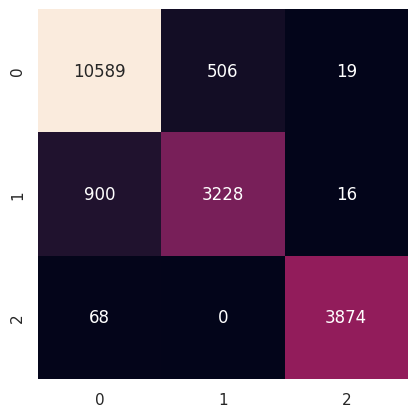

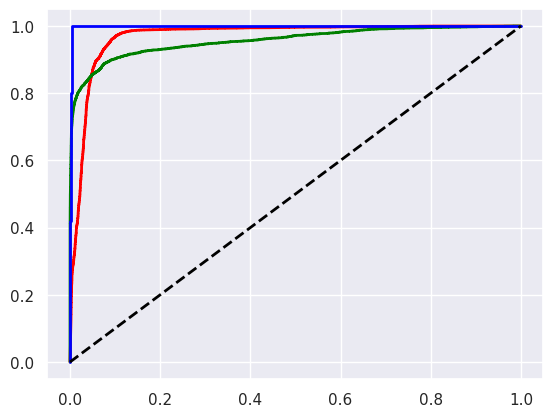

In [13]:
NaiveBayes.evaluate(X_test, y_test)

In [14]:
NaiveBayes.save(new_name='NB_undersampled')